In [137]:
from STL_to_path import *
from GPT import *
from NL_to_STL import *
from visualization import *

In [138]:
T_max = 15              # time horizon in seconds 
dt = 0.3                # time step in seconds
max_acc = 10            # maximum acceleration in m/s^2
N = int(T_max/dt)       # number of time steps
print("N = ", N)

N_max =  50


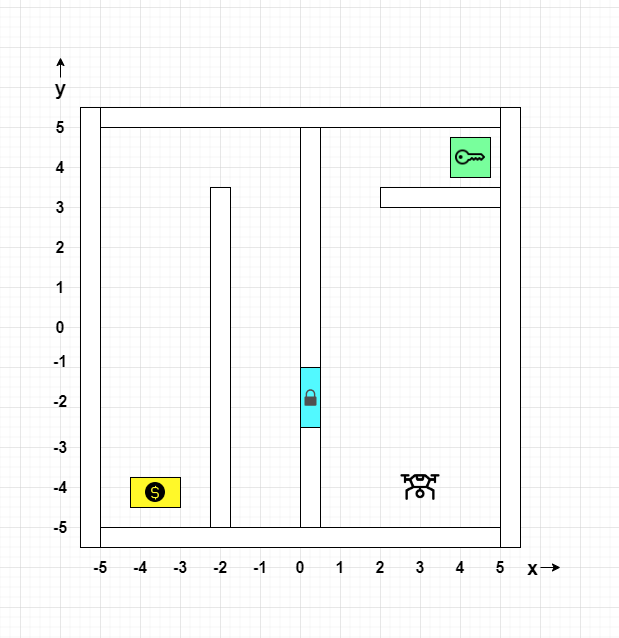

In [139]:
from IPython.display import Image 
image_path = '../Treasure_hunt.png'                 # path to the image
Image(filename=image_path, width=400, height=400)   # display the image

In [140]:
x0 = np.array([3.,-4.,0.5,0.,0.,0.]) # initial state: x, y, z, vx, vy, vz

objects = {"key": (3.75, 4.75, 3.75, 4.75, 1., 2.),
           "chest": (-4.25, -3, -4.5, -3.75, 0., 0.75),
           "door": (0., 0.5, -2.5, -1, 0., 2.5),
           "bounds": (-5., 5., -5., 5., 0., 3.),
           "NE_inside_wall": (2., 5., 3., 3.5, 0., 3.),
           "south_mid_inside_wall": (0., 0.5, -5., -2.5, 0., 3.),
           "north_mid_inside_wall": (0., 0.5, -1., 5., 0., 3.),
           "west_inside_wall": (-2.25, -1.75, -5., 3.5, 0., 3.),
           "top_door": (0., 0.5, -2.5, -1, 2.5, 3.),
           }

In [141]:
# make separate dictionaries for the fixed objects and the interactive objects
fixed_objects = {k: v for k, v in objects.items() if k not in ["key", "chest", "door", "bounds"]}
interactive_objects = {k: v for k, v in objects.items() if k in ["key", "chest", "door"]}

In [142]:
display("Fixed objects", fixed_objects)
display("Interactive objects", interactive_objects)

'Fixed objects'

{'NE_inside_wall': (2.0, 5.0, 3.0, 3.5, 0.0, 3.0),
 'south_mid_inside_wall': (0.0, 0.5, -5.0, -2.5, 0.0, 3.0),
 'north_mid_inside_wall': (0.0, 0.5, -1.0, 5.0, 0.0, 3.0),
 'west_inside_wall': (-2.25, -1.75, -5.0, 3.5, 0.0, 3.0),
 'top_door': (0.0, 0.5, -2.5, -1, 2.5, 3.0)}

'Interactive objects'

{'key': (3.75, 4.75, 3.75, 4.75, 1.0, 2.0),
 'chest': (-4.25, -3, -4.5, -3.75, 0.0, 0.75),
 'door': (0.0, 0.5, -2.5, -1, 0.0, 2.5)}

In [143]:
def get_clwh(object):
    # get center, length, width, height of object
    xmin, xmax, ymin, ymax, zmin, zmax = objects[object]
    center = ((xmin + xmax)/2, (ymin + ymax)/2, (zmin + zmax)/2)
    length = xmax - xmin
    width = ymax - ymin
    height = zmax - zmin
    return center, length, width, height

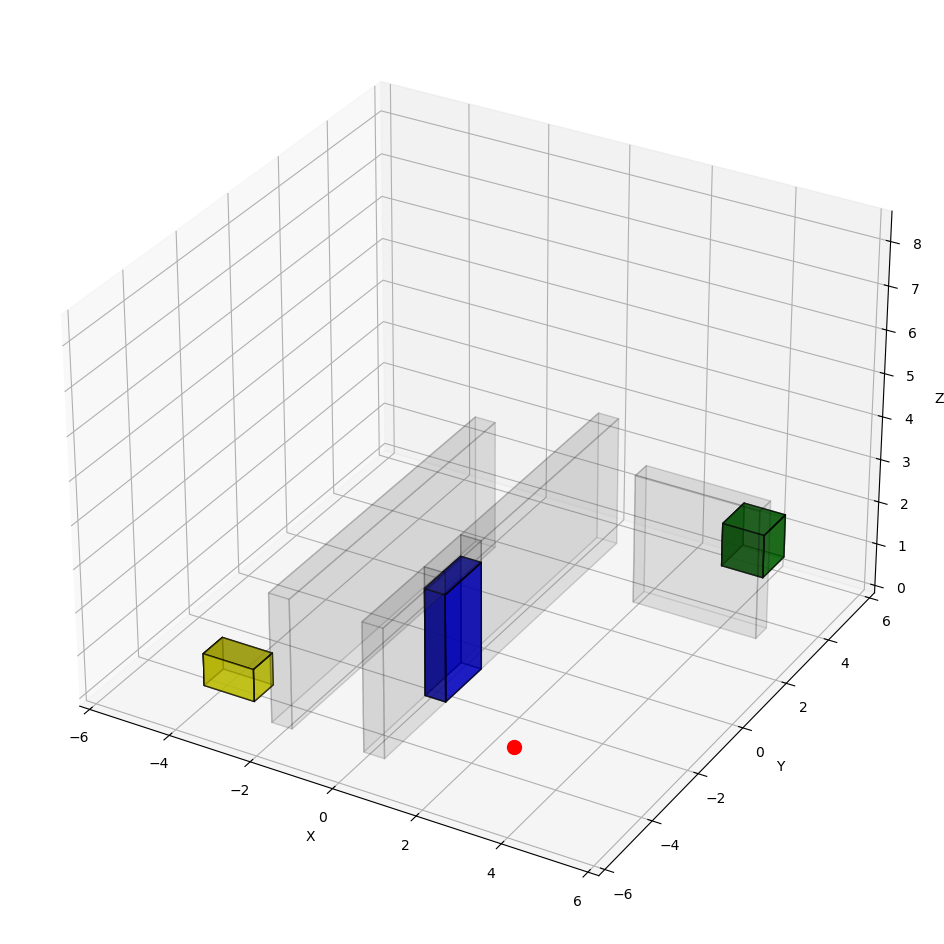

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

for object in fixed_objects:
    # omit the ceiling and the floor
    if object in ["ceiling", "floor"]:
        continue
    center, length, width, height = get_clwh(object)
    X, Y, Z = shapes.make_cuboid(center, (length, width, height))
    ax.plot_surface(X, Y, Z, color='gray', rstride=1, cstride=1, alpha=0.05, linewidth=1., edgecolor='k')

# show key in green, chest in yellow, door in blue
for object in interactive_objects:
    center, length, width, height = get_clwh(object)
    X, Y, Z = shapes.make_cuboid(center, (length, width, height))
    if object == "key":
        ax.plot_surface(X, Y, Z, color='green', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')
    elif object == "chest":
        ax.plot_surface(X, Y, Z, color='yellow', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')
    elif object == "door":
        ax.plot_surface(X, Y, Z, color='blue', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')

# show the initial position of the drone
ax.scatter(x0[0], x0[1], x0[2], color='red', s=100)


ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(0, 8.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [145]:
user_input = [{"role": "user", "content": "I think there might be some valuable items in the chest.\nI want to open it, but a door is blocking the way and it is locked.\nI think there should be a key somewhere to open the door.\nPlease help me find a way to get to the chest."}]
# display the user input only
print(user_input[0]["content"])

I think there might be some valuable items in the chest.
I want to open it, but a door is blocking the way and it is locked.
I think there should be a key somewhere to open the door.
Please help me find a way to get to the chest.


In [146]:
#translator = NL_to_STL(objects, T_max, dt, print_instructions = True)
#spec = translator.extract_STL_formula(user_input)

In [147]:
fixed_objects

{'NE_inside_wall': (2.0, 5.0, 3.0, 3.5, 0.0, 3.0),
 'south_mid_inside_wall': (0.0, 0.5, -5.0, -2.5, 0.0, 3.0),
 'north_mid_inside_wall': (0.0, 0.5, -1.0, 5.0, 0.0, 3.0),
 'west_inside_wall': (-2.25, -1.75, -5.0, 3.5, 0.0, 3.0),
 'top_door': (0.0, 0.5, -2.5, -1, 2.5, 3.0)}

In [148]:
#fixed_objects_to_add = []
fixed_objects_to_add = fixed_objects

In [149]:
#spec = f'STL_formulas.inside_cuboid(objects["key"]).eventually(0, {int(N_max/2)}) & STL_formulas.inside_cuboid(objects["chest"]).eventually({int(N_max/2)}, {N_max})'
spec = 'STL_formulas.outside_cuboid(objects["door"]).until(STL_formulas.inside_cuboid(objects["key"]), 0, N_max) & STL_formulas.inside_cuboid(objects["chest"]).eventually(0, N_max) '

# add bounds
spec = spec + f' & STL_formulas.inside_cuboid(objects["bounds"]).always(0, {N_max})'

# append avoid fixed objects
for object in fixed_objects_to_add:
    spec = spec + f' & STL_formulas.outside_cuboid(fixed_objects["{object}"]).always(0, {N_max})'

In [150]:
print(spec)
spec = eval(spec)
spec

STL_formulas.outside_cuboid(objects["door"]).until(STL_formulas.inside_cuboid(objects["key"]), 0, N_max) & STL_formulas.inside_cuboid(objects["chest"]).eventually(0, N_max)  & STL_formulas.inside_cuboid(objects["bounds"]).always(0, 50) & STL_formulas.outside_cuboid(fixed_objects["NE_inside_wall"]).always(0, 50) & STL_formulas.outside_cuboid(fixed_objects["south_mid_inside_wall"]).always(0, 50) & STL_formulas.outside_cuboid(fixed_objects["north_mid_inside_wall"]).always(0, 50) & STL_formulas.outside_cuboid(fixed_objects["west_inside_wall"]).always(0, 50) & STL_formulas.outside_cuboid(fixed_objects["top_door"]).always(0, 50)


In [151]:
solver = STLSolver(spec, x0, T_max)
x,u = solver.generate_trajectory(dt, max_acc, verbose=True)

Setting up optimization problem...
Setup complete in 27.42504358291626 seconds.
<class 'gurobipy.MQuadExpr'>
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 31944 rows, 29443 columns and 81569 nonzeros
Model fingerprint: 0xa9dac8b6
Model has 153 quadratic objective terms
Variable types: 19345 continuous, 10098 integer (10098 binary)
Coefficient statistics:
  Matrix range     [3e-01, 1e+03]
  Objective range  [1e+00, 1e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-01, 1e+03]
Presolve removed 18786 rows and 18249 columns
Presolve time: 0.12s
Presolved: 13158 rows, 11194 columns, 41887 nonzeros
Presolved model has 147 quadratic objective terms
Variable types: 299 continuous, 10895 integer (10895 binary)
Found heuristic solution: objec

In [152]:
# save x and u to a file
np.save('x.npy', x)
np.save('u.npy', u)

In [153]:
# read x and u from a file
x = np.load('x.npy')
u = np.load('u.npy')

In [154]:
x.shape

(6, 51)

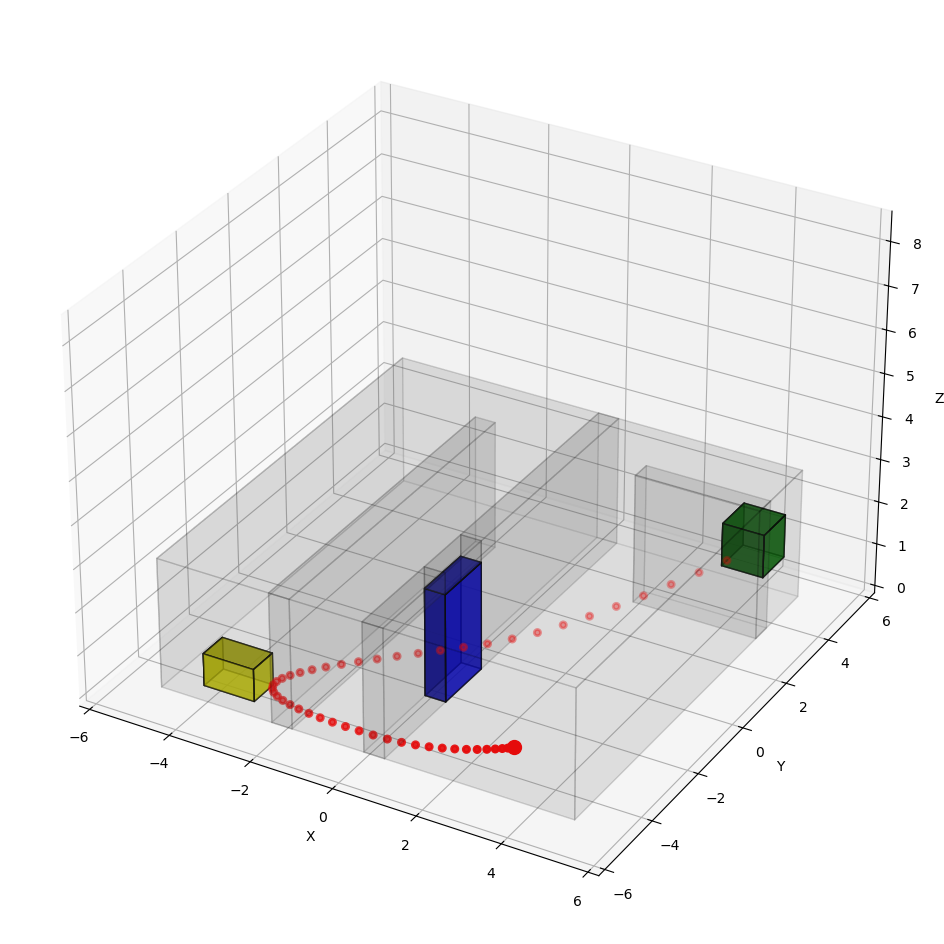

In [155]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

for object in fixed_objects:
    center, length, width, height = get_clwh(object)
    X, Y, Z = shapes.make_cuboid(center, (length, width, height))
    ax.plot_surface(X, Y, Z, color='gray', rstride=1, cstride=1, alpha=0.05, linewidth=1., edgecolor='k')

# add bounds
center, length, width, height = get_clwh("bounds")
X, Y, Z = shapes.make_cuboid(center, (length, width, height))
ax.plot_surface(X, Y, Z, color='gray', rstride=1, cstride=1, alpha=0.05, linewidth=1., edgecolor='k')

# show key in green, chest in yellow, door in blue
for object in interactive_objects:
    center, length, width, height = get_clwh(object)
    X, Y, Z = shapes.make_cuboid(center, (length, width, height))
    if object == "key":
        ax.plot_surface(X, Y, Z, color='green', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')
    elif object == "chest":
        ax.plot_surface(X, Y, Z, color='yellow', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')
    elif object == "door":
        ax.plot_surface(X, Y, Z, color='blue', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')

# show the initial position of the drone
ax.scatter(x0[0], x0[1], x0[2], color='red', s=100)

# plot the trajectory
ax.scatter(x[0,:], x[1,:], x[2,:], color='red', linewidth=2)


ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(0, 8.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [157]:
print(x.shape)
print(np.min(x, axis=1)[:3], np.max(x, axis=1)[:3])
print(np.min(x, axis=1)[3:], np.max(x, axis=1)[3:])


(6, 51)
[-3.00916029 -4.36369358  0.        ] [3.75 4.   1.  ]
[-1.11871761 -0.11195014 -0.17948794] [1.38122729 1.66666667 0.52631579]


(array([ 3.,  4.,  3.,  3.,  3.,  5.,  5.,  8.,  6., 11.]),
 array([0.        , 0.13812273, 0.27624546, 0.41436819, 0.55249091,
        0.69061364, 0.82873637, 0.9668591 , 1.10498183, 1.24310456,
        1.38122729]),
 <BarContainer object of 10 artists>)

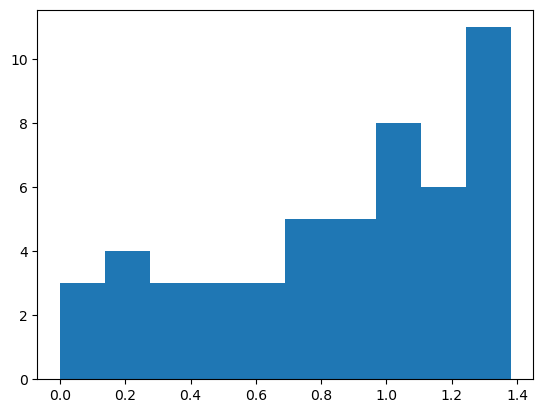

In [171]:
plt.hist(np.abs(x[3,:]))

(array([21.,  4.,  3.,  2.,  3.,  3.,  3.,  3.,  3.,  6.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
        1.66666667]),
 <BarContainer object of 10 artists>)

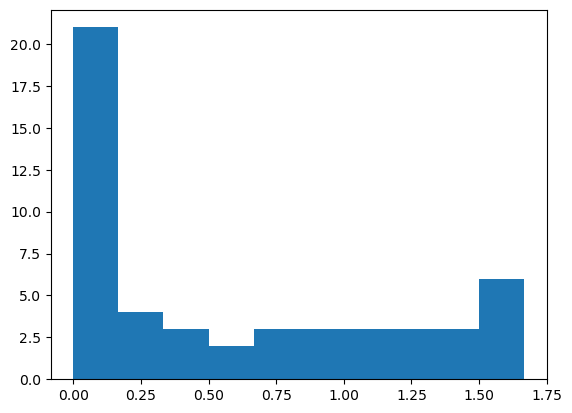

In [172]:
plt.hist(np.abs(x[4,:]))

(array([30.,  2.,  5.,  6.,  0.,  1.,  1.,  1.,  1.,  4.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579]),
 <BarContainer object of 10 artists>)

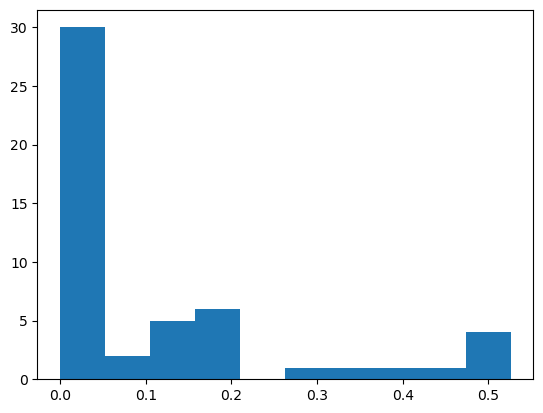

In [173]:
plt.hist(np.abs(x[5,:]))